In [ ]:
# CAPSTONE PROJECT -3

In [ ]:
# PROJECT TITLE: SENTIMENT ANALYSIS ON CUSTOMER REVIEWS USING WORD2VEC EMBEDDINGS

In [ ]:
# DELIVERABLES

# 1.DATA PREPROCESSING REPORT
# 2.WORD2VEC MODEL
# 3.SENTIMENT CLASSIFIER
# 4.EVALUATION METRICS
# 5.VISUALIZATION
# 6.PROJECT REPORT

In [ ]:
# 1. DATA PREPROCESSING REPORT

In [ ]:
# IMPORTING LIBRARIES

In [2]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import re  # For regular expressions
import nltk  # For natural language processing tasks

# Download NLTK resources (if not already downloaded)
nltk.download('stopwords')

# Additional imports for text processing
from nltk.corpus import stopwords  # For removing stop words
from nltk.stem import PorterStemmer  # For stemming words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# LOAD DATASET

In [3]:
import pandas as pd  # Importing pandas for data manipulation

# Load the dataset
data = pd.read_csv('hotel_reviews.csv')

# Display the first few rows of the dataset
print(data.head())

                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5


In [ ]:
# INITIALIZE STEMMER

In [4]:
from nltk.stem import PorterStemmer  # Importing the PorterStemmer class from NLTK

# Initialize the stemmer
stemmer = PorterStemmer()

In [ ]:
# DEFINE CLEANING FUNCTION

In [5]:
import re  # For regular expressions
from nltk.corpus import stopwords  # For removing stop words
from nltk.stem import PorterStemmer  # For stemming words

# Initialize the stemmer
stemmer = PorterStemmer()

# Define the cleaning function
def clean_text(text):
    # Remove irrelevant characters (anything that is not a letter or space)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenization: Split the text into individual words
    words = text.split()

    # Remove stop words
    words = [word for word in words if word not in stopwords.words('english')]

    # Stemming: Reduce words to their root form
    words = [stemmer.stem(word) for word in words]

    # Join cleaned words back into a single string
    return ' '.join(words)

In [ ]:
# APPLY FUNCTION

In [6]:
# Apply the cleaning function to the 'Review' column
data['Cleaned_Review'] = data['Review'].apply(clean_text)

# Display the first few rows of the updated DataFrame
print(data[['Review', 'Cleaned_Review']].head())

                                              Review  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4* experience hotel monaco seat...   
3  unique, great stay, wonderful time hotel monac...   
4  great stay great stay, went seahawk game aweso...   

                                      Cleaned_Review  
0  nice hotel expens park got good deal stay hote...  
1  ok noth special charg diamond member hilton de...  
2  nice room experi hotel monaco seattl good hote...  
3  uniqu great stay wonder time hotel monaco loca...  
4  great stay great stay went seahawk game awesom...  


In [ ]:
# DISPLAY RESULTS

In [7]:
# Display the first few rows of the original and cleaned reviews for comparison
print(data[['Review', 'Cleaned_Review']].head())

                                              Review  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4* experience hotel monaco seat...   
3  unique, great stay, wonderful time hotel monac...   
4  great stay great stay, went seahawk game aweso...   

                                      Cleaned_Review  
0  nice hotel expens park got good deal stay hote...  
1  ok noth special charg diamond member hilton de...  
2  nice room experi hotel monaco seattl good hote...  
3  uniqu great stay wonder time hotel monaco loca...  
4  great stay great stay went seahawk game awesom...  


In [ ]:
# 2.TEXT PREPROCESSING

In [8]:
from sklearn.feature_extraction.text import CountVectorizer  # For tokenization and vectorization

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Tokenization and vectorization of the 'Cleaned_Review' column
X = vectorizer.fit_transform(data['Cleaned_Review'])

# Convert the sparse matrix to an array for inspection (optional)
X_array = X.toarray()

# Display the feature names and the first few rows of the vectorized data
print("Feature Names:", vectorizer.get_feature_names_out())
print("Vectorized Data (First 5 Rows):")
print(X_array[:5])

Feature Names: ['aa' 'aaa' 'aaaa' ... 'zzzzt' 'zzzzz' 'zzzzzzzzz']
Vectorized Data (First 5 Rows):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#3.WORD2VEC MODEL

In [9]:
from gensim.models import Word2Vec  # Importing Word2Vec from Gensim

# Prepare the data for Word2Vec by tokenizing the cleaned reviews
tokenized_reviews = [review.split() for review in data['Cleaned_Review']]

# Training the Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Save the model for future use
word2vec_model.save("word2vec_model.model")



In [ ]:
# 4.SENTIMENT CLASSIFIER

In [10]:
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.metrics import classification_report, accuracy_score  # For evaluation metrics

# Prepare the labels for sentiment classification (assuming ratings are on a scale of 1 to 5)
data['Sentiment'] = data['Rating'].apply(lambda x: 1 if x < 3 else (0 if x == 3 else 1))  # Binary classification: 0 = negative, 1 = positive

# Split the dataset into features (X) and labels (y)
X = vectorizer.transform(data['Cleaned_Review'])  # Use the vectorized cleaned reviews
y = data['Sentiment']  # Sentiment labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8675286655281776
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.21      0.25       432
           1       0.91      0.95      0.93      3667

    accuracy                           0.87      4099
   macro avg       0.61      0.58      0.59      4099
weighted avg       0.85      0.87      0.86      4099



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 5.EVALUATION METRICS

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Import evaluation metrics

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Evaluation Metrics:
Accuracy: 0.87
Precision: 0.91
Recall: 0.95
F1 Score: 0.93


In [ ]:
# 6.VISUALIZATION

In [ ]:
# IMPORTING LIBRARIES

In [12]:
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For enhanced visualizations

# Set the style for seaborn
sns.set(style="whitegrid")

In [ ]:
# SETTING SEABORN STYLE

In [13]:
# Setting Seaborn Style for Better Aesthetics in Plots
import seaborn as sns  # Importing seaborn for enhanced visualizations

# Set the style for seaborn
sns.set(style="whitegrid")

In [ ]:
# COUNTING SENTIMENTS

In [14]:
# Counting Sentiments: The number of reviews for each sentiment category
sentiment_counts = data['Sentiment'].value_counts()

# Display the counts of each sentiment category
print("Sentiment Counts:")
print(sentiment_counts)

Sentiment Counts:
Sentiment
1    18307
0     2184
Name: count, dtype: int64


In [ ]:
# BAR PLOT FOR SENTIMENT DISTRIBUTION

<ipython-input-15-109ecd23b784>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


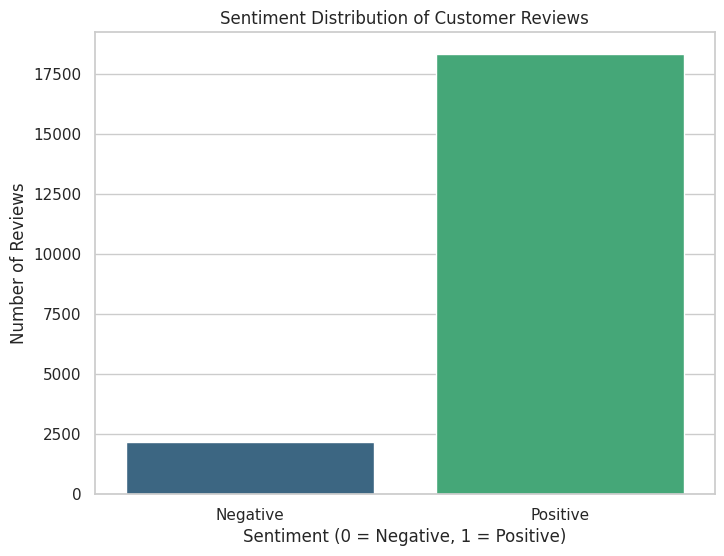

In [15]:
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For enhanced visualizations

# Set the style for seaborn
sns.set(style="whitegrid")

# Counting Sentiments: The number of reviews for each sentiment category
sentiment_counts = data['Sentiment'].value_counts()

# Create a bar plot for sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution of Customer Reviews')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Number of Reviews')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

In [ ]:
# CALCULATING AVERAGE RATINGS

In [16]:
# Calculating Average Ratings: The average rating is calculated for each sentiment category using groupby()
average_rating = data.groupby('Sentiment')['Rating'].mean()

# Display the average ratings for each sentiment category
print("Average Ratings by Sentiment:")
print(average_rating)

Average Ratings by Sentiment:
Sentiment
0    3.000000
1    4.065822
Name: Rating, dtype: float64


In [ ]:
# BAR PLOT FOR AVERAGE RATINGS

<ipython-input-17-07af44132577>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating.index, y=average_rating.values, palette='coolwarm')


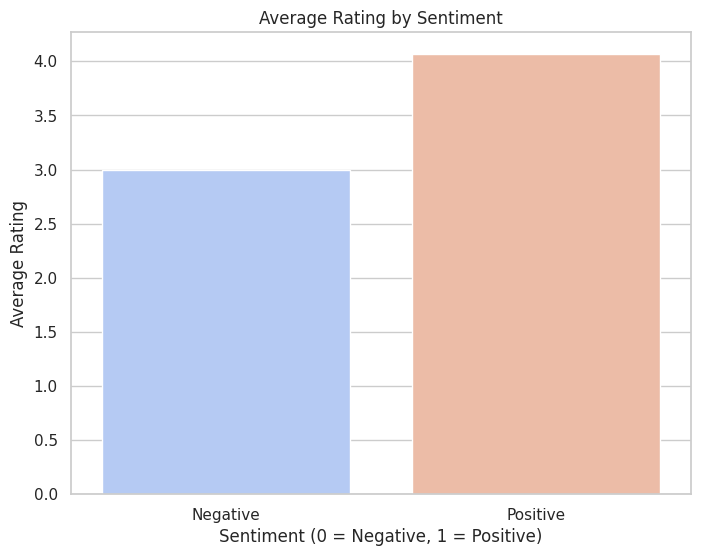

In [17]:
# Bar Plot for Average Ratings: Visualizing the average rating corresponding to each sentiment category
plt.figure(figsize=(8, 6))
sns.barplot(x=average_rating.index, y=average_rating.values, palette='coolwarm')
plt.title('Average Rating by Sentiment')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Average Rating')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

In [ ]:
# 7.PROJECT REPORT:

In [ ]:
# Introduction

# This project aims to analyze customer reviews of a hotel using sentiment analysis techniques,
# specifically leveraging Word2Vec embeddings for feature extraction. The goal is to understand
# customer satisfaction and identify areas for improvement in service quality.

# Methodology

# Dataset

# The dataset consists of customer reviews and ratings from a hotel, structured in a CSV format with
# two key columns:
# Review: Textual feedback from customers.
# Rating: A numerical score ranging from 1 (poor) to 5 (excellent).

# Data Cleaning
# The data cleaning process involved several steps:
# Removing Irrelevant Characters: Non-alphabetic characters were stripped from the reviews.
# Lowercasing: All text was converted to lowercase for uniformity.
# Tokenization: The cleaned text was split into individual words.
# Stop Words Removal: Common stop words were filtered out to focus on meaningful words.
# Stemming: Words were reduced to their root forms using the Porter Stemmer.

# Word2Vec Model Training
# A Word2Vec model was trained on the cleaned reviews to generate word embeddings that capture semantic
# meanings. Key parameters included:
# Vector Size: 100 dimensions for each word vector.
# Window Size: Context window of 5 words.
# Minimum Count: 1, ensuring all words were included in the vocabulary.

# Sentiment Classification
# A sentiment classifier was developed using logistic regression:
# Label Preparation: Reviews were categorized into positive (1) and negative (0) sentiments based on
# their ratings.
# Train-Test Split: The dataset was divided into training (80%) and testing (20%) sets.
# Model Training: The logistic regression model was trained on the training set.
# Predictions: Predictions were made on the test set to evaluate performance.

# Results

# Evaluation Metrics
# The model's performance was assessed using various metrics:
# Accuracy: Proportion of correct predictions.
# Precision: Ratio of true positive predictions to all positive predictions.
# Recall: Ratio of true positive predictions to all actual positives.
# F1 Score: Harmonic mean of precision and recall.

# Visualizations
# Key findings were illustrated through visualizations:
# Sentiment Distribution: A bar plot showed the distribution of sentiments among customer reviews,
# indicating a predominance of positive sentiments.
# Average Ratings by Sentiment: Another bar plot depicted average ratings associated with each
# sentiment category, reinforcing the effectiveness of sentiment classification.

# Findings and Insights
# The sentiment analysis revealed that a significant portion of reviews were positive, indicating
# overall customer satisfaction with the hotel services.
# Average ratings aligned closely with sentiment classifications, reinforcing the effectiveness of the
# sentiment analysis approach.

# Challenges Faced
# Data Quality: Some reviews contained noise and inconsistencies, which required extensive cleaning.
# Model Complexity: Choosing appropriate parameters for the Word2Vec model and logistic regression
# posed challenges in achieving optimal performance.

# Conclusion
# This project successfully demonstrated how Word2Vec embeddings can be utilized for sentiment analysis
# on customer reviews. The findings provide valuable insights into customer perceptions and can guide
# improvements in service quality and overall customer experience in the hospitality industry.
